<a href="https://colab.research.google.com/github/corralem/MITFutureMakers/blob/main/Day22SpeechEmotionAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
from keras import regularizers

In [3]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

In [4]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [5]:
data, sampling_rate = librosa.load('/content/output10.wav') # WRITE YOUR AUDIO RECORDING FILE PATH HERE

Populating the interactive namespace from numpy and matplotlib


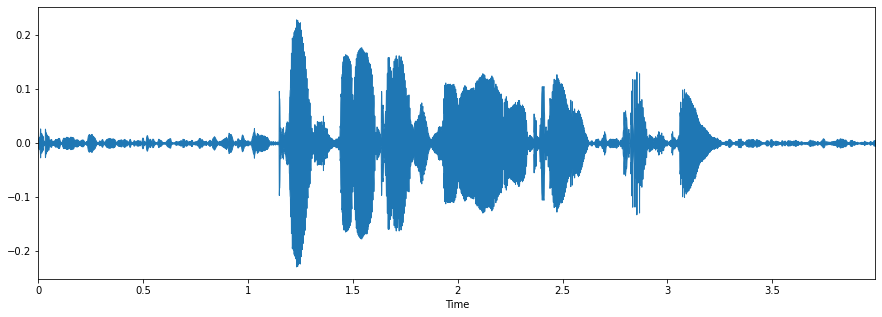

In [6]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [7]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [8]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-25.238331,-22.132595,-23.350739,-25.239397,-24.939737,-26.836416,-25.241795,-27.371634,-30.164677,-29.704441,-28.534031,-25.979219,-28.219913,-30.998274,-30.62772,-27.92972,-23.860323,-22.217247,-22.642708,-23.741951,-23.818655,-25.214252,-22.534117,-20.878782,-23.853691,-25.562084,-25.632097,-24.614288,-23.716936,-24.877537,-26.554094,-28.799681,-28.83499,-26.67787,-22.960491,-20.939291,-22.443199,-24.867413,-25.513742,-24.485029,...,-15.771799,-17.558256,-20.92379,-22.157658,-25.271595,-26.769024,-25.35668,-26.105593,-28.243063,-27.887592,-26.617662,-27.076138,-20.054556,-15.213389,-16.735313,-25.919861,-25.803057,-26.74255,-23.947697,-21.269583,-16.524199,-8.16401,-6.108889,-8.751629,-10.401754,-7.227857,-8.272667,-9.838804,-12.697706,-13.689721,-14.87881,-14.405282,-17.028645,-20.240223,-19.313658,-18.530674,-19.030399,-16.440081,-17.811083,-25.755239


In [9]:
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
livepreds

1/1 [==============================] - 10s 10s/step


array([[4.1139423e-12, 1.2195868e-34, 4.2451719e-16, 1.4249551e-19,
        5.2869184e-21, 1.2575851e-05, 3.1591483e-18, 9.9801564e-01,
        7.1917451e-04, 1.2526022e-03]], dtype=float32)

In [10]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()

In [11]:
# Define the encoding of the ten string labels into their respective integer labels (0-9), according to the order of the original H5 project ("https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer")
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

[0 1 2 3 4 5 6 7 8 9]


In [12]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_fearful'], dtype='<U14')